In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = torch.linspace(0, 799, 800)

In [ ]:
y = torch.sin(x*2*3.1416/40)

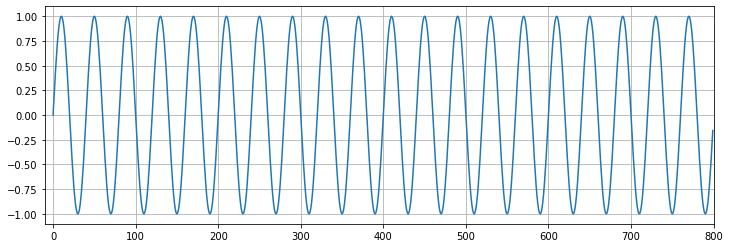

In [ ]:
plt.figure(figsize=(12, 4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [ ]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

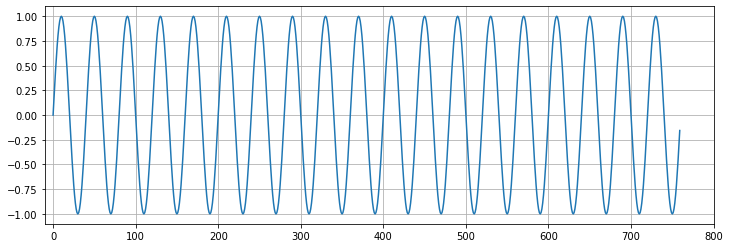

In [ ]:
plt.figure(figsize=(12, 4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train_set.numpy())

#### Create the functions for defining the batches of a sequence and the target

In [ ]:
def input_data(seq, ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        target = seq[i+ws]
        out.append((window, target))
    return out

Define the window size, the traing and test data

In [ ]:
window_size = 40

train_data = input_data(train_set, window_size)

In [ ]:
len(train_data)

720

In [ ]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor(1.4480e-05))

In [ ]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor(0.1564))

### The LSTM model

The input size is how many elements are as an input here we 1 sequence
The hidden size is how many neurons do you want
The output size is how many values you try to predict with the net

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)
        # we need to condense the output of the neurons to 1 single output
        self.linear = nn.Linear(hidden_size, out_size)
        # (H, C)
        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size)) # initialize the hidden state

    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]

In [ ]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


In [22]:
preds = y[-window_size:].tolist()

preds[-window_size:]

[0.00027750342269428074,
 0.15671049058437347,
 0.30928465723991394,
 0.4542362093925476,
 0.5880099534988403,
 0.7073045372962952,
 0.8091825246810913,
 0.8911352753639221,
 0.9511423707008362,
 0.9877321124076843,
 0.9999999403953552,
 0.9876438975334167,
 0.9509681463241577,
 0.8908792734146118,
 0.8088510632514954,
 0.7069057822227478,
 0.5875537395477295,
 0.45373377203941345,
 0.308748334646225,
 0.15615351498126984,
 -0.0002864123380277306,
 -0.15671929717063904,
 -0.30929312109947205,
 -0.45424413681030273,
 -0.5880171656608582,
 -0.7073108553886414,
 -0.8091877698898315,
 -0.8911393284797668,
 -0.9511451721191406,
 -0.9877334833145142,
 -0.9999999403953552,
 -0.9876424670219421,
 -0.950965404510498,
 -0.8908752202987671,
 -0.8088458180427551,
 -0.7068995237350464,
 -0.5875465273857117,
 -0.45372581481933594,
 -0.30873987078666687,
 -0.15614472329616547]

In [ ]:
epochs = 10
future = 40

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()

        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch {i} Loss {loss.item()}")

    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])

        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
            preds.append(model(seq).item)

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Perfonce on test range: {loss}")

    plt.figure(figsize=(12, 4))
    plt.xlim(700, 801)
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[-window_size:])
    plt.show()

In [ ]:
epochs = 15
window_size = 40
future = 40

all_data = input_data(y, window_size)

In [ ]:
import time
start_time = time.time()

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()

        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch {i} Loss {loss.item()}")

total_time = time.time() - start_time
print(total_time/60)

## Forecast into unknown future

In [ ]:
preds = y[-window_size:].tolist()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
            preds.append(model(seq).item)

In [ ]:
plt.figure(figsize=(12, 4))
plt.xlim(0, 841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800, 840), preds[window_size:])
plt.show()